In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('airfoil_self_noise.dat',sep='\t', header=None)

Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [5]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.columns = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side', 'pressure level' ]

In [7]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
## first to train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=33)

In [11]:
y_train

819     120.015
382     125.721
1443    129.415
101     129.004
96      106.111
         ...   
1225    116.066
658     112.945
578     119.137
391     139.918
1044    116.128
Name: pressure level, Length: 1007, dtype: float64

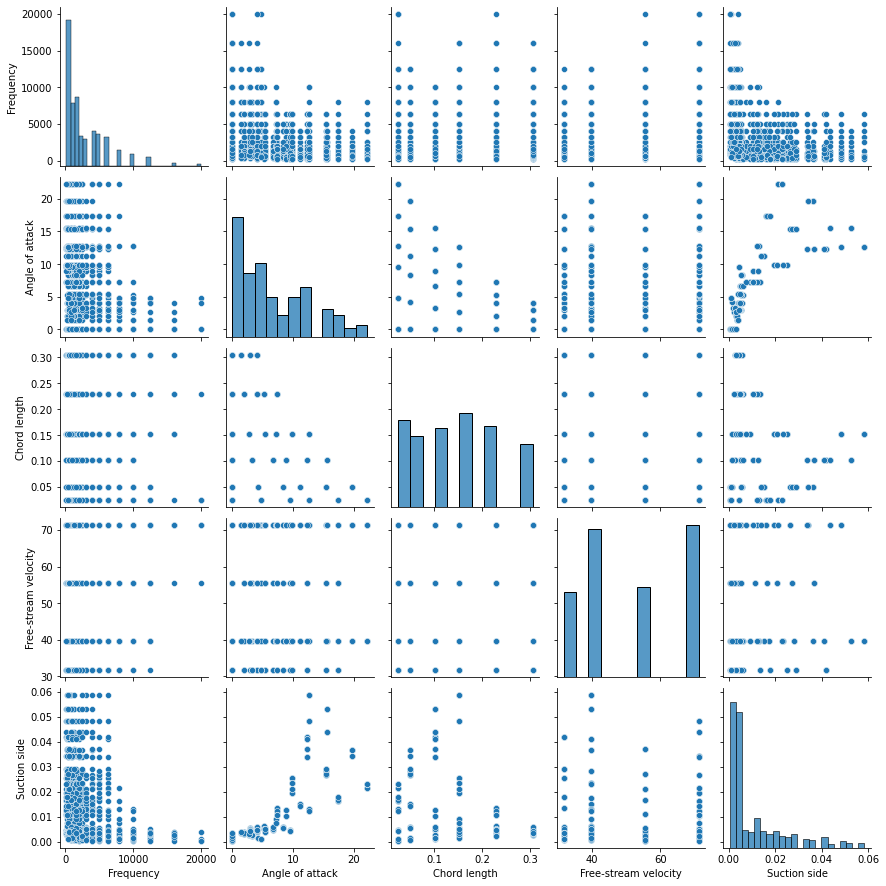

In [12]:
import seaborn as sns
sns.pairplot(X_train)

In [13]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.257344,0.035282,0.144002,-0.214892
Angle of attack,-0.257344,1.000000,-0.526753,0.049176,0.748115
Chord length,0.035282,-0.526753,1.000000,0.011068,-0.237092
Free-stream velocity,0.144002,0.049176,0.011068,1.000000,-0.016101
Suction side,-0.214892,0.748115,-0.237092,-0.016101,1.000000


C:\Users\Ranjeet\anaconda3\envs\python_mysql\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency'>

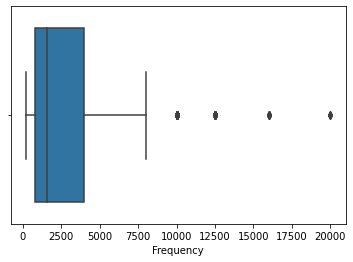

In [14]:
sns.boxplot(X_train['Frequency'])

In [15]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side', 'pressure level'],
      dtype='object')

C:\Users\Ranjeet\anaconda3\envs\python_mysql\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

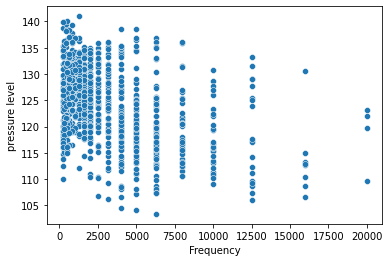

In [16]:
sns.scatterplot(X_train['Frequency'], y_train)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [22]:
import pickle
pickle_model= pickle.load(open('model.pkl', 'rb'))
## batch input
pickle_model.predict(X_test)


array([128.77085688, 124.77171762, 134.52280633, 126.88055851,
       132.15318642, 131.12582587, 128.42657957, 120.60575792,
       128.43657219, 128.11284694, 120.33961503, 118.66810505,
       121.36956485, 116.05754694, 122.73837272, 125.51936815,
       125.64811188, 127.26879636, 116.68343647, 119.71159499,
       119.84217525, 126.87703927, 119.29584998, 124.00022924,
       129.76851019, 128.90009313, 121.39520247, 121.51742493,
       109.1647353 , 121.70080663, 125.73945581, 133.43274098,
       129.45743973, 123.25388402, 125.22705336, 123.91091431,
       127.14726899, 120.53915156, 124.19428709, 112.40383472,
       127.52464633, 124.81869416, 132.85358115, 117.93540821,
       128.29322027, 121.89203614, 128.48105427, 123.10218306,
       119.7910695 , 126.88139101, 127.83911368, 122.39705449,
       128.87436192, 116.77729708, 122.59568371, 119.7996535 ,
       121.31161392, 131.60812373, 123.31966593, 121.21621492,
       122.49975254, 126.62307106, 126.05481323, 129.86

In [ ]:
# single input 

In [23]:
!pip install flask

  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


In [43]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [44]:
regressor = SVR()

In [45]:
regressor.fit(X_train, y_train)

SVR()

In [49]:
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.10428321048265765

In [51]:
import seaborn as sns
df = sns.load_dataset('iris')

In [62]:
df.iloc[:,0:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
!pip list


Package                Version
---------------------- -----------
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
attrs                  21.4.0
avro                   1.11.0
backcall               0.2.0
bleach                 4.1.0
cassandra-driver       3.25.0
certifi                2021.10.8
cffi                   1.15.0
charset-normalizer     2.0.12
click                  8.0.4
colorama               0.4.4
colorlover             0.3.0
cufflinks              0.17.3
cycler                 0.11.0
debugpy                1.5.1
decorator              5.1.1
defusedxml             0.7.1
dnspython              2.2.0
docutils               0.18.1
entrypoints            0.4
et-xmlfile             1.1.0
Flask                  2.1.2
fonttools              4.31.2
geomet                 0.2.1.post1
idna                   3.3
importlib-metadata     4.10.1
importlib-resources    5.4.0
ipykernel              6.8.0
ipython                7.31.1
ipython-genutils       0.2.0
ipywidgets      